# Mulvariate regression

In this example we are using multivariate regression to determined the concentration of three different sugars : Fructose, Glucose and Sucrose in aqueous solution using FTIR. The samples were measured on a Diamond ATR. Spectra were recorded on different days by operators of varying capabilities.

Data is provided in the form of two csv files, one containing IR spectra and one containing concentrations. 




Required packages

- `matplotlib`
- `pandas`
- `scikit-learn`
- `numpy`
- `xarray`

In [1]:
import pandas as pd


import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
%matplotlib inline

## Multivariate models

First we load the spectral data:

In [2]:
spec_data = np.genfromtxt("sugar_spectra.csv", unpack=True)
wn = spec_data[0]
absorption = spec_data[1:]

For the sugar concentrations we use pandas. `index_col` makes pandas use the first column as index

In [3]:
concentrations = pd.read_csv("sugar concentration.csv", index_col=0)

In [4]:
print(f"Number of measurements: {len(concentrations)}")
print(f"Number of spectra: {len(absorption)}")
concentrations

Number of measurements: 32
Number of spectra: 32


,Fructose,Sucrose,Glucose
0,2.0032,2.000,2.0000
1,2.0032,2.000,20.0000
2,20.0320,2.000,2.0000
3,2.0032,20.000,2.0000
4,20.0320,2.000,20.0000
5,20.0320,20.000,2.0000
6,2.0032,20.000,20.0000
7,20.0320,20.000,20.0000
8,2.0000,1.984,2.0140
9,2.0000,1.984,20.1400


**Note**: The absorption of a three-part sugar solution was measured at two possible concentrations for each of the three sugars, $c_F$, $c_S$, and $c_G$, with $c = \{2, 20\}$. This results in $2^3 = 8$ unique concentration combinations. Four sets of measurements were taken, each consisting of the same 8 combinations, leading to a total of 32 spectra.

For convenience, we put the spectra into a DataArray with the same index as the concentrations:


In [5]:
sugar_da = xr.DataArray(absorption, 
                        dims=["idx", "wn"], # same order as numpy axes
                        coords={"wn":("wn", wn),
                                "idx":concentrations.index})
sugar_da

<xarray.DataArray (idx: 32, wn: 1712)>
array([[-2.10557191e-04,  1.67126083e-04,  7.35706650e-04, ...,
         9.88518586e-04,  1.24210073e-03,  2.31534039e-04],
       [-4.32274173e-05,  1.70591884e-05,  3.43002612e-05, ...,
        -3.40422353e-04,  1.10409269e-03,  1.62874092e-03],
       [ 1.43391034e-03,  1.40934193e-03,  1.31752132e-03, ...,
         1.61317724e-03,  1.50201318e-03, -5.36957057e-04],
       ...,
       [-1.51924061e-04, -1.70296276e-04, -1.28910206e-05, ...,
         1.40991330e-03,  1.01412693e-03,  1.20708195e-03],
       [-2.04554512e-04, -4.18788288e-04, -5.31320868e-04, ...,
         2.20293389e-03,  2.25328095e-03,  2.52244365e-03],
       [ 2.11384482e-04,  4.40155010e-04,  8.14707819e-05, ...,
         5.02631208e-03,  5.10346657e-03,  3.91386123e-03]])
Coordinates:
  * wn       (wn) float64 3.998e+03 3.996e+03 3.994e+03 ... 702.0 700.1 698.1
  * idx      (idx) int64 0 1 2 3 4 5 6 7 8 9 ... 22 23 24 25 26 27 28 29 30 31

This is the full spectral dataset, i.e. all the 32 spectra:

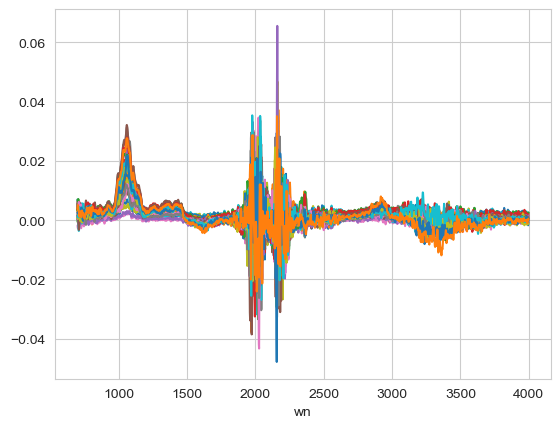

In [6]:
sugar_da.plot.line(x="wn", add_legend=False)
plt.show()

This is what the dataset looks like. Since this measurement was taken on a diamond ATR using water as background, there are several regions in the spectrum showing high noise. 

In this case the best part of the spectrum to use lies within the range of 850 cm^-1^  to 1500 cm^-1^. Use to `.sel` to restrict the spectral range accordingly and assign the result to the variable "sugar_reduced".

**Task**: Use the band assignment table provided with this exercise and your knowledge about the structure of carbohydrate and the sample to answer the following questions:

Q1: Which functional of carbohydrates are we likely measuring in this reduced spectral range.

Q2: What causes the high noise (=very little light reaches the detector) in the range between 3000 cm^-1^  to 3500 cm^-1^

**Answers:**
1. In the reduced region we're likely measuring  *C-0 stretching* observed in the range of 1000 and 1050 cm<sup>-1</sup>. It corresponds to the 
various C-0 bonds in alcohols and ethers, which 
  are abundant in carbohydrates.
2. The region 3000 to 3500 cm<sup>-1</sup> corresponds to O-H stretching vibrations of water ("str, intramolecular bonded OH"). If water is 
present, it 
absorbs a significant 
amount 
of light leading to low signal intensity and high noise in this region.

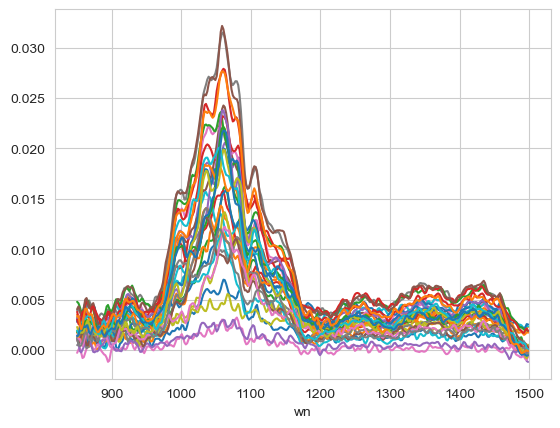

In [7]:
sugar_reduced = sugar_da.sortby("wn").sel(wn=slice(850,1500))
sugar_reduced.plot.line(x="wn", add_legend=False)
plt.show()

# Partial Least Squares (PLS) Regression
The goal is to predict the concentrations of the components $c_F$, $c_S$, and $c_G$ based on a given spectrum. 
For this, we use **Partial Least Squares (PLS)** regression.
Unlike **Ordinary Least Squares (OLS)**, which struggles with multicollinearity (where predictors are highly correlated), PLS can handle this issue by reducing the dimensionality of the predictor space.

While PLS performs dimensionality reduction in a way similar to **Principal Component Analysis (PCA)**, it differs significantly.
In PLS, the predictors $X$ (independent variables) are projected into a lower-dimensional **latent space** that captures the maximum variance.
However, unlike PCA, PLS simultaneously projects the response variable $y$ (dependent variable) into its own latent space.
The method is designed to maximize the covariance between the latent spaces of $X$ and $y$, ensuring that the components found are not only relevant for the predictors but also for predicting the response variable.

## Mathematical Description
Given:  
- A matrix of predictors $\mathbf{X} \in \mathbb{R}^{n \times p}$, where $n$ is the number of observations and $p$ is the number of predictors.  
- A matrix of responses $\mathbf{Y} \in \mathbb{R}^{n \times m}$, where $m$ is the number of response variables (for univariate response, $m = 1$).

### Step 1: Latent Variables
PLS finds **latent variables** $\mathbf{T}$ and $\mathbf{U}$ such that:
$$
\mathbf{T} = \mathbf{X} \mathbf{W}
$$
$$
\mathbf{U} = \mathbf{Y} \mathbf{C}
$$
Where:
- $\mathbf{T}$ and $\mathbf{U}$ are the scores (projections) of $\mathbf{X}$ and $\mathbf{Y}$, respectively.  
- $\mathbf{W} \in \mathbb{R}^{p \times k}$ and $\mathbf{C} \in \mathbb{R}^{m \times k}$ are the weight matrices for $\mathbf{X}$ and $\mathbf{Y}$, respectively.

### Step 2: Maximizing Covariance
PLS aims to find the weight vectors $\mathbf{w}$ and $\mathbf{c}$ that maximize the covariance between $\mathbf{T}$ and $\mathbf{U}$:
$$
\max_{\mathbf{w}, \mathbf{c}} \, \text{Cov}(\mathbf{T}, \mathbf{U}) = \mathbf{T}^T \mathbf{U}
$$

### Step 3: Deflation
Once the first pair of components $\mathbf{t}_1$ and $\mathbf{u}_1$ is found, the matrices $\mathbf{X}$ and $\mathbf{Y}$ are **deflated**:
$$
\mathbf{X}_{\text{new}} = \mathbf{X} - \mathbf{t}_1 \mathbf{p}_1^T
$$
$$
\mathbf{Y}_{\text{new}} = \mathbf{Y} - \mathbf{t}_1 \mathbf{q}_1^T
$$
Here, $\mathbf{p}_1$ and $\mathbf{q}_1$ are the loadings for $\mathbf{X}$ and $\mathbf{Y}$, respectively.
This process is repeated for subsequent components.

### Step 4: Regression on Latent Variables
After obtaining the latent variables $\mathbf{T}$ (for $\mathbf{X}$), PLS uses **Ordinary Least Squares (OLS)** regression to predict the response $\mathbf{Y}$ as:
$$
\hat{\mathbf{Y}} = \mathbf{T} \mathbf{B}
$$
Where $\mathbf{B}$ is the matrix of regression coefficients relating the latent variables $\mathbf{T}$ to $\mathbf{Y}$.

### Summary of Key Equations:
1. **Latent Variables**: $\mathbf{T} = \mathbf{X} \mathbf{W}$ and $\mathbf{U} = \mathbf{Y} \mathbf{C}$.  
2. **Covariance Maximization**: $\max_{\mathbf{w}, \mathbf{c}} \, \text{Cov}(\mathbf{T}, \mathbf{U})$.  
3. **Deflation**: $\mathbf{X}_{\text{new}} = \mathbf{X} - \mathbf{t}_1 \mathbf{p}_1^T$, $\mathbf{Y}_{\text{new}} = \mathbf{Y} - \mathbf{t}_1 \mathbf{q}_1^T$.  
4. **OLS Regression on Latent Variables**: $\hat{\mathbf{Y}} = \mathbf{T} \mathbf{B}$.

The next steps follow almost identically to the code discussed in the exercise:

In [8]:
from sklearn.cross_decomposition import PLSRegression
X = sugar_reduced.transpose("idx",...).sortby("idx")
y = concentrations
print(f"X (absorption by wn):\n{X}\n\ny (component concentrations):\n{y}")

X (absorption by wn):
<xarray.DataArray (idx: 32, wn: 337)>
array([[ 1.26580289e-03,  1.56622974e-03,  1.59483415e-03, ...,
         2.52150756e-04, -3.15797333e-05, -1.51354761e-04],
       [ 1.22857571e-03,  9.63741797e-04,  1.04845548e-03, ...,
        -6.91100358e-05, -3.47354304e-04, -6.18027581e-04],
       [ 1.84687297e-03,  1.68715511e-03,  1.60119962e-03, ...,
         3.36570316e-04,  1.48869833e-04,  1.51744171e-04],
       ...,
       [ 1.92622084e-03,  1.64742325e-03,  1.83501875e-03, ...,
         5.63048117e-04,  2.03200616e-04,  4.15230788e-05],
       [ 1.40300533e-03,  1.44549389e-03,  2.07778136e-03, ...,
        -4.76454530e-04, -5.68239251e-04, -5.03449002e-04],
       [ 3.30797955e-03,  3.39435181e-03,  2.61511840e-03, ...,
        -1.09276807e-04, -9.42239058e-06, -1.01461141e-04]])
Coordinates:
  * wn       (wn) float64 850.5 852.4 854.3 ... 1.495e+03 1.497e+03 1.498e+03
  * idx      (idx) int64 0 1 2 3 4 5 6 7 8 9 ... 22 23 24 25 26 27 28 29 30 31

y (component

In [38]:
from sklearn.cross_decomposition import PLSRegression

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import LeaveOneOut

In [39]:
# instantiate
pls = PLSRegression(scale=False)

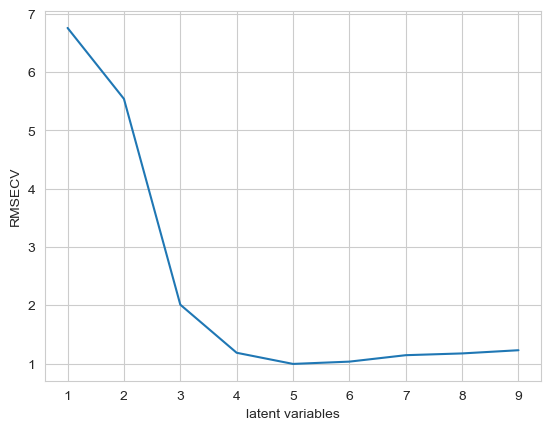

In [40]:

gcv = GridSearchCV(pls, param_grid={"n_components":np.arange(1, 10)},
                   cv=LeaveOneOut(), scoring="neg_root_mean_squared_error")

gcv.fit(X, y)

res = pd.DataFrame(gcv.cv_results_)

plt.plot(res.param_n_components, -res.mean_test_score)
plt.xlabel("latent variables")
plt.ylabel("RMSECV")
plt.show()

**Task**: Choose the number latent variables and then calibrate the PLSRegression. Explain your reasoning.

**Note**: 'RMSECV' stand for Root Mean Squared Error of Cross-Validation.

**Answer**: The principal component plot shows a knick at 5 latent variables. Hence, picking 5 as the number of latent variables will maximize the 
covariance between $X$ (spectra) and $y$ (concentrations).

In [41]:
pls = PLSRegression(n_components=5, scale=True)
pls.fit(X,y)

PLSRegression(n_components=5)

Finally, we use the model to predict carbohydrate concentrations. 

In [42]:
prediction_arr = pls.predict(sugar_reduced.transpose("idx",...) )
prediction = pd.DataFrame(prediction_arr, 
                          columns=concentrations.columns, 
                          index=concentrations.index)
prediction

,Fructose,Sucrose,Glucose
0,2.977978,1.562871,1.918291
1,2.852664,1.120624,19.472376
2,16.215325,3.926459,3.978930
3,3.360093,18.514239,4.085589
4,19.042476,1.536838,20.495667
5,19.478292,19.041188,3.299553
6,3.200109,20.727502,18.524648
7,20.161380,21.821135,18.494379
8,2.816576,2.288606,0.641130
9,2.061224,0.875723,19.578371


Below, we calculate the difference between predicted and actual values:

**Task**: Some of the predictions are likely better than others.

Q3: Which predictions are especially far off?

Q4: Is there any trend for points that work especially well (or bad)? 

In [43]:
deviations = (prediction - concentrations)
deviations

,Fructose,Sucrose,Glucose
0,0.974778,-0.437129,-0.081709
1,0.849464,-0.879376,-0.527624
2,-3.816675,1.926459,1.978930
3,1.356893,-1.485761,2.085589
4,-0.989524,-0.463162,0.495667
5,-0.553708,-0.958812,1.299553
6,1.196909,0.727502,-1.475352
7,0.129380,1.821135,-1.505621
8,0.816576,0.304606,-1.372870
9,0.061224,-1.108277,-0.561629


Calculate **z-scores** for the sum of absolute differences. The z-score quantifies how many standard deviations a given value is away from the mean. 
Thu,s the z-score can be used for outlier detection. We use a threshold of 2. A z-score > 2 means that a data point is more than 2 standard 
deviations away from the mean of the sums of absolute deviations, i.e. in the 5% of most extreme values.

In [44]:
deviations['rmse'] = np.sqrt(((deviations ** 2).sum(axis=1)) / 3)
sorted_deviations = deviations.sort_values(by='rmse', ascending=False)
sorted_deviations

,Fructose,Sucrose,Glucose,rmse
2,-3.816675,1.926459,1.978930,2.719952
3,1.356893,-1.485761,2.085589,1.673153
31,1.923631,-1.027158,-1.759971,1.617911
25,0.028014,1.533634,-2.118356,1.509994
29,-2.231570,0.025684,1.269311,1.482308
27,-1.758427,-0.850831,1.574335,1.448506
30,1.311889,-0.151459,-2.071173,1.418185
22,0.538805,-2.302670,0.309693,1.377015
7,0.129380,1.821135,-1.505621,1.366281
13,0.893929,0.540248,1.964253,1.284428


Calculate **z-scores** for the sum of absolute differences. The z-score quantifies how many standard deviations a given value is away from the mean. 
Thu,s the z-score can be used for outlier detection. We use a threshold of 2. A z-score > 2 means that a data point is more than 2 standard 
deviations away from the mean of the sums of absolute deviations, i.e. in the 5% of most extreme values.

In [45]:
threshold = 2

mean_rmse = sorted_deviations['rmse'].mean()
std_rmse = sorted_deviations['rmse'].std()
sorted_deviations['z_score'] = (sorted_deviations['rmse'] - mean_rmse) / std_rmse
sorted_true_by_deviation = pd.concat([concentrations.loc[sorted_deviations.index], sorted_deviations['rmse'], sorted_deviations['z_score']], axis=1)
outlier_idx = sorted_deviations[sorted_deviations['z_score'] > threshold].index
sorted_true_by_deviation

,Fructose,Sucrose,Glucose,rmse,z_score
2,20.0320,2.000,2.0000,2.719952,3.601303
3,2.0032,20.000,2.0000,1.673153,1.260982
31,20.1200,19.928,20.0480,1.617911,1.137476
25,2.0120,1.993,20.0480,1.509994,0.896208
29,2.0120,19.928,20.0480,1.482308,0.834311
27,2.0120,19.928,2.0048,1.448506,0.758739
30,20.1200,19.928,2.0048,1.418185,0.690951
22,20.0000,20.000,2.0000,1.377015,0.598907
7,20.0320,20.000,20.0000,1.366281,0.574908
13,20.0000,1.984,20.1400,1.284428,0.391911


A3: There is a single outlier (z-score > 3!), namely the measurement with index 2.

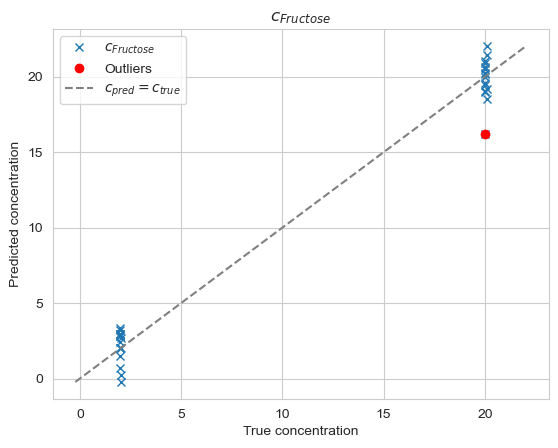

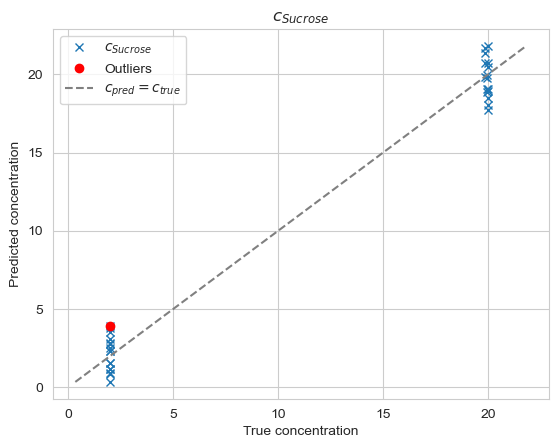

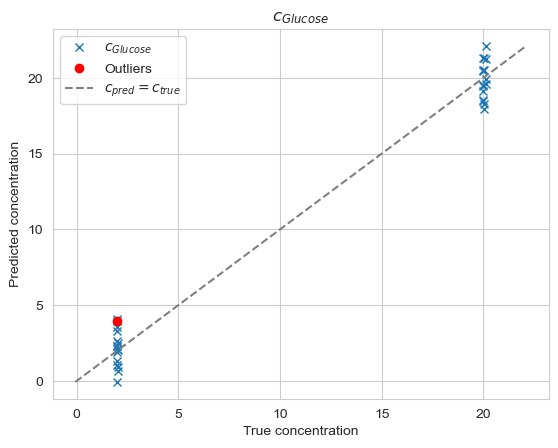

In [46]:
# Plot predicted vs true concentration and highlight the outliers
for col in prediction.columns:
    cpred = prediction[col]
    ctrue = y[col]
    
    # Plot predicted vs true concentration
    plt.plot(ctrue, cpred, "x", label=f"$c_{{{col}}}$")
    
    # Highlight the outliers with a different marker and color
    outlier_cpred = cpred.loc[outlier_idx]
    outlier_ctrue = ctrue.loc[outlier_idx]
    plt.plot(outlier_ctrue, outlier_cpred, "o", color='red', label="Outliers")
    
    # Add labels and title
    plt.xlabel("True concentration")
    plt.ylabel("Predicted concentration")
    plt.title(f"$c_{{{col}}}$")
    
    # Plot the reference line where c_pred = c_true
    min_val = min(ctrue.min(), cpred.min())
    max_val = max(ctrue.max(), cpred.max())
    plt.plot([min_val, max_val], [min_val, max_val], color='gray', linestyle='--', label="$c_{pred} = c_{true}$")
    
    plt.legend()
    plt.show()

We categorize predictions as average if they lie within one standard deviation of the mean RMSE, bad if the lie one std above, and good if they lie
 1 std below.

In [47]:
good_threshold = -1
bad_threshold = 1

# Categorize predictions based on z-score
def categorize_prediction(z):
    if z <= good_threshold:
        return 'good'
    elif z >= bad_threshold:
        return 'bad'
    else:
        return 'average'

sorted_true_by_deviation['prediction_quality'] = sorted_true_by_deviation['z_score'].apply(categorize_prediction)
sorted_true_by_deviation

,Fructose,Sucrose,Glucose,rmse,z_score,prediction_quality
2,20.0320,2.000,2.0000,2.719952,3.601303,bad
3,2.0032,20.000,2.0000,1.673153,1.260982,bad
31,20.1200,19.928,20.0480,1.617911,1.137476,bad
25,2.0120,1.993,20.0480,1.509994,0.896208,average
29,2.0120,19.928,20.0480,1.482308,0.834311,average
27,2.0120,19.928,2.0048,1.448506,0.758739,average
30,20.1200,19.928,2.0048,1.418185,0.690951,average
22,20.0000,20.000,2.0000,1.377015,0.598907,average
7,20.0320,20.000,20.0000,1.366281,0.574908,average
13,20.0000,1.984,20.1400,1.284428,0.391911,average


We group the data by prediction quality and compute mean concentrations to analyze trends.

In [48]:
mean_deviation_by_group = sorted_true_by_deviation[['prediction_quality', 'rmse', 'z_score']].groupby('prediction_quality').mean()
print(mean_deviation_by_group)

                        rmse   z_score
prediction_quality                    
average             1.080169 -0.064750
bad                 2.003672  1.999920
good                0.465592 -1.438756


Check the correlation between concentrations and z-scores to quantify the relationships.

In [49]:
components = ['Fructose', 'Sucrose', 'Glucose']
correlations = sorted_true_by_deviation[components + ['z_score']].corr()
print(correlations['z_score'])

Fructose    0.216676
Sucrose     0.123906
Glucose     0.021162
z_score     1.000000
Name: z_score, dtype: float64


It seems like there are a positive correlations between Fructose/Sucrose concentration and prediction error (high z-score).

Above, we always use the keyword argument `scale=True` when instantiting `PLSRegression`. 

**Task**: Rerun the regressions with `scale=False` (the default).
 
Q5: Does this improve or degrade the performance? Explain your thoughts on why this is?

In [50]:
pls_2 = PLSRegression(n_components=5, scale=False)
pls_2.fit(X,y)
prediction_arr_2 = pls.predict(sugar_reduced.transpose("idx",...) )
prediction_2 = pd.DataFrame(prediction_arr, 
                          columns=concentrations.columns, 
                          index=concentrations.index)
deviations_2 = (prediction_2 - concentrations)
deviations_2['rmse'] = np.sqrt(((deviations_2 ** 2).sum(axis=1)) / 3)
sorted_deviations_2 = deviations_2.sort_values(by='rmse', ascending=False)

mean_rmse_2 = sorted_deviations_2['rmse'].mean()
std_rmse_2 = sorted_deviations_2['rmse'].std()
sorted_deviations_2['z_score'] = (sorted_deviations_2['rmse'] - mean_rmse_2) / std_rmse_2
sorted_true_by_deviation_2 = pd.concat([concentrations.loc[sorted_deviations_2.index], sorted_deviations_2['rmse'], sorted_deviations_2['z_score']], axis=1)
sorted_true_by_deviation_2

,Fructose,Sucrose,Glucose,rmse,z_score
2,20.0320,2.000,2.0000,2.719952,3.601303
3,2.0032,20.000,2.0000,1.673153,1.260982
31,20.1200,19.928,20.0480,1.617911,1.137476
25,2.0120,1.993,20.0480,1.509994,0.896208
29,2.0120,19.928,20.0480,1.482308,0.834311
27,2.0120,19.928,2.0048,1.448506,0.758739
30,20.1200,19.928,2.0048,1.418185,0.690951
22,20.0000,20.000,2.0000,1.377015,0.598907
7,20.0320,20.000,20.0000,1.366281,0.574908
13,20.0000,1.984,20.1400,1.284428,0.391911


The results hardly changed. This is because, in the original dataset, the concentrations for the different components (our target values) are all 
on the same scale, namely [2, 20].